#### <a id='top'></a>

# Homework 5: Distributions
***

**Name**: Aanvi Guliani

***

This assignment is due on Canvas by **MIDNIGHT on Monday October 19**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

## (30 pts) Problem 1: Theory (Continuous Distributions)
***

Suppose you are modeling the probability of observing various levels of cuteness in hedgehogs you encounter.  Let $X$ be a random variable representing the observed cuteness, which is *obviously* nonnegative and has units of deci*awws*. You decide to use the following pdf for $X$:

$$
f(x) = \begin{cases}
         c \frac{1}{x^2} & =1 \leq x < \infty \\
         0                           & \text{otherwise}
       \end{cases}
$$
where $c$ is some normalizing constant.

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid probability density function. Then, make a plot of the probability density function for hedgehog cuteness, $f(x)$. Be sure to label your axes!

**Solution**  
If $f(x)$ is a probability density function, where $f(x)$ represents hedgehog cuteness, then:  
$$\int_{-\infty}^{\infty} f(x)dx = 1$$  
This can be split up into
$$\int_{-\infty}^{1} 0dx + \int_{1}^{\infty} c\frac{1}{x^2}dx = 1$$  
$$0 + \int_{1}^{\infty} c\frac{1}{x^2}dx = 1$$   
$$\int_{1}^{\infty} c\frac{1}{x^2}dx = 1$$   
Using the power rule, we can solve the integral:
$$c\int_{1}^{\infty} x^{-2}dx = 1$$   
$$-cx^{-1}\Big|_1^{\infty} = 1$$  
since the limit of -1/x goes to 0 as x approaches infinity:  
$$c(0 - \frac{-1}{1})= 1$$  
$$c(1) = 1$$  
$$\fbox{c = 1}$$

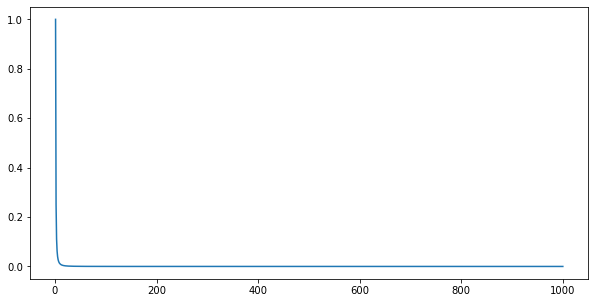

In [140]:
# plot the graph of 1/x^2
x = np.linspace(1, 1000, 1000) 
y = 1/(x ** 2) 
fig = plt.figure(figsize = (10, 5))  
plt.plot(x, y) 
plt.show()

**Part B**: Compute *by hand* the cumulative density (cdf) function $F(x)$ for $X$.

**Solution**  
The cumulative distribution function $F(x) = P(X \leq x)$. Thus, $F(x)$ is as follows:  
$$\int_{1}^{x} f(x)dx$$  
$$= \int_{1}^{x} \frac{1}{x^2}dx$$  
$$= -\frac{1}{x}\Big|_1^{x} $$  
$$= -\frac{1}{x} - (-1) $$  
$$\fbox{F(x) = 1 - $\frac{1}{x}$} $$

**Part C:**  Use the cdf you derived in **Part B** to calculate the median ($\tilde{x}$) cuteness of all hedgehogs.

**Solution**. 
The median ($\tilde{x}$) cuteness of all hedgehogs is the 50th percentile, or when $F(\tilde{x}) = 0.5$. Thus, the median is as follows:  
$$1 - \frac{1}{\tilde{x}} = 0.5$$  
$$- \frac{1}{\tilde{x}} = -1.5$$  
$$1 - \frac{1}{\tilde{x}} = 0.5$$  
$$ \tilde{x} = \frac{-1}{-1.5}$$  
$$\fbox{ $\tilde{x}$ = $\frac{2}{3}$}$$

**Part D**: It is a well-known fact that any hedgehog whose cuteness exceeds 2.5 deciawws is **totes adorbz**. Use the cdf you computed in **Part B** to find the probability that any arbitrary hedgehog that you observe is totes adorbz.

**Solution** 
We are looking for $P(x > 2.5)$, which is the same thing as $1 - P(x \leq 2.5)$. We can rewrite this as follows:  
$$ 1 - P(x \leq 2.5)$$  
$$ 1 - F(2.5)$$  
$$ 1 - (1 - \frac{1}{2.5})$$  
$$ 1 - 1 + \frac{1}{2.5}$$  
$$\fbox{P(x > 2.5) = 0.4}$$

**Part E:** You have been painstakingly collecting data on hedgehogs all over town, and the cuteness is damn near overwhelming. Suppose you sample 5 hedgehogs, and the cuteness of any given hedgehog is independent of the cuteness of all other hedgehogs. What is the probability that more than half of them are totes adorbz? Keep at least 5 decimal places in your answer.

**Solution**  
The probability 1 hedgehog is totes adorbz is 0.4, as found in the previous problem. However, the more hedgehogs we have, the lower the probability gets of being totes adorbz. This is modeled by:  
$$
f(x) = \begin{cases}
         (0.4)^x  & 0\leq x \leq 5 \\
         0                           & \text{otherwise}
       \end{cases}
$$  
The probability of more than 2.5 cases is as follows:  
$$ P(x > 2.5) = 1 - P(x\leq 2.5)$$  
$$ 1 - \int_{0}^{2.5} f(x)dx$$    
$$ 1 - \int_{0}^{2.5} 0.4^x dx$$ 
$$ 1 - \frac{1}{(1-ln2)(ln5)(5^{(1-\frac{ln2}{ln5})x})} \Big|_0^{2.5}$$   
$$ 1 - \frac{5^{\frac{ln2}{ln5}+0.5}-125}{125(ln5-ln2)}$$   
$$ \fbox{= 0.01908}$$ 

***
<a/ id='p2'></a>
[Back to top](#top)

## (30 pts) Problem 2: Theory (Named Distributions)
***
Person $X$ is waiting at a bus stop where the bus arrives *exactly* every ten minutes. Person Y is at a different stop, waiting for a bus that arrives *on average* every 8 minutes. Neither person knows how long ago the last bus arrived, and the arrival time of one bus is not dependent on the other bus.


Answer the problems below assuming the wait time for person $Y$ follows an exponential distribution and the wait time for person $X$ follows a uniform distribution.

**Part A**: What are the values of the parameters of the uniform distribution for person X?

**Solution**   
The uniform distribution for Person X is as follows. Given that x = number of minutes that person x waits:  
$$
f(x) = \begin{cases}
         \frac{1}{10-0} =\frac{1}{10} &  0\leq x \leq 10 \\
         0                           & \text{otherwise}
       \end{cases}
$$

**Part B**: What are the values of the parameters of the exponential distribution for person Y ?


**Solution**  
Given that Person Y is waiting for a bus that arrives every 8 minutes, 
$$
f(x) = \begin{cases}
         \lambda e^{-\lambda x} &  x \geq 0 \\
         0                           & \text{otherwise}
       \end{cases}
$$
Since it arrives every 8 minutes, $\lambda = \frac{1}{8}$, which is our parameter for the exponential distribution for person Y
$$
f(x) = \begin{cases}
         \frac{1}{8} e^{-\frac{1}{8} x} &  x \geq 0 \\
         0                           & \text{otherwise}
       \end{cases}
$$  
$$ \fbox{$\lambda$ = $\frac{1}{8}$}$$

**Part C**: Let $Z$ be defined as the total amount of time both people (combined) wait.  What are $E[Z]$ and $Var[Z]$?

**Solution**  
Since $E[Z] and Var[Z]$ are combined wait times, $E[Z] = E[X] + E[Y]$, and $Var[Z] = Var[X] + Var[Y]$. Let's calculate $E[Z]$:  
  
$$E[Z] = E[X] + E[Y]$$  
$$E[X] = \int_{0}^{10} \frac{x}{10}dx$$  
$$E[X] = \frac{x^2}{20}\Big|_0^{10}$$  
$$E[X] = \frac{100}{20}-\frac{0}{20}$$ 
$$E[X] = 5$$   

$$E[Y] = \frac{1}{\lambda}$$
$$E[Y] = \frac{1}{\frac{1}{8}}$$

Putting this together:
$$E[Z] = E[X] + E[Y]$$  
$$E[Z] = 5 + \frac{1}{\frac{1}{8}}$$  
$$\fbox{E[Z] = 13}$$   
    
Calculating $Var[Z]$  
$Var[Z] = Var[X] + Var[Y]$
$$Var[X] = \int_{0}^{10} (x-5)^2\frac{1}{10}dx$$  
$$Var[X] = \frac{(x-5)^3}{30}\Big|_0^{10}$$  
$$Var[X] = \frac{(5)^3}{30} + \frac{(5)^3}{30} = \frac{25}{3}$$  


$$Var[Y] = \frac{1}{\lambda^2}$$  
$$Var[Y] = 64$$  

Putting this together:
$$Var[Z] = Var[X] + Var[Y]$$  
$$Var[Z] = \frac{25}{3} + 64$$  
$$\fbox{Var[Z] = 72.33333}$$  

**Part D**: What is the exact probability both people wait more than 4 minutes?


**Solution**  
The probability that both wait more than 4 mins is $P(x>4) * P(y>4)$, which is as follows:  
$$P(x>4) = 1 - P(x \leq 4)$$  
$$P(x>4) = 1 - F(4) \text{ where } F(x) = \frac{x}{10}$$    
$$P(x>4) = 1 - \frac{4}{10} = \frac{6}{10}$$    
$$P(y>4) = 1 - F(4) \text{ where } F(x) = \int \frac{1}{8}e^{-\frac{x}{8}}dx$$
The integral comes out to be:  
$$-e^{-\frac{x}{8}}$$. 
Plugging this back in:  
$$P(y>4) = 1 - -e^{-\frac{4}{8}}$$  
$$P(y>4) = 1 - \frac{8-\frac{8}{\sqrt{e}}}{8}$$    
$$P(y>4) = \frac{\sqrt{e}}{e}$$  
Putting this all together:  
$$P(x>4) * P(y>4)$$  
$$ = \fbox{0.36392}$$

***
<a/ id='p3'></a>
[Back to top](#top)

## (35 pts) Problem 3: Simulation and Theory (Games)
***

The Riddler is a column on the website https://fivethirtyeight.com that posts logic, math, and probability puzzles each week.  Some of puzzles can be attacked by simulation and discrete probability: things that we have the tools to solve!

(https://fivethirtyeight.com/features/how-low-can-you-roll/)

You are given a fair, unweighted 10-sided die with sides labeled 0 to 9 and a sheet of paper to record your score. (If the very notion of a fair 10-sided die bothers you, and you need to know what sort of three-dimensional solid it is, then forget it — you have a random number generator that gives you an integer value from 0 to 9 with equal probability. Your loss — the die was a collector’s item.)

To start the game, you roll the die. Your current “score” is the number shown, divided by 10. For example, if you were to roll a 7, then your score would be 0.7. Then, you keep rolling the die over and over again. Each time you roll, if the digit shown by the die is less than or equal to the last digit of your score, then that roll becomes the new last digit of your score. Otherwise you just go ahead and roll again. The game ends when you roll a zero.

For example, suppose you roll the following: 6, 2, 5, 1, 8, 1, 0. After your first roll, your score would be 0.6, After the second, it’s 0.62. You ignore the third roll, since 5 is greater than the current last digit, 2. After the fourth roll, your score is 0.621. You ignore the fifth roll, since 8 is greater than the current last digit, 1. After the sixth roll, your score is 0.6211. And after the seventh roll, the game is over — 0.6211 is your final score.

What will be your average final score in this game?

**Part A**: Suppose our current value is $0.abcd$ for some 1-9 integers $a, b, c, d.$  What is the theoretical distribution of $e$, the next *term* in the final score's decimal representation?  Name the distribution and list all of its outcomes and their probabilities.  Note that "there are no additional terms" should have non-zero probability.

**Solution**   
The next term $e$ can take on any value such that $0 \leq e \leq d$. A "successful" roll would be when the roll value is between 0 and d, while an unsuccessful roll is between d+1 and 9. Thus, the next term would fit a geometric distribution. **X ∼ geom(p)**, with $p=\frac{d}{10}$, with $p$ being the probability that the roll is "successful"

**Part B**: What is the expected number of *rolls* until you're done?  What distribution is this?



**Solution**  
The expected number of rolls would be the number of rolls until a "successful" roll of 0. This would mean that **X ∼ geom(p)**, with p = 0.1 (the probability of success / rolling a 0). The expected number of rolls would be 1/p = 10 rolls.

**Part C**: Simulate 10000 trials of this game, recording a score for each, then compute and print the average score over all of those trials. 

(Note: To check your result, you can find the exact *expected* solution in the following week's column: https://fivethirtyeight.com/features/can-you-decode-the-riddler-lottery/... but we want to simulate!)


In [130]:
def roll():
    return np.random.randint(10)

def loop():
    val = 1
    num = 0
    prevVal = 10
    i = 0
    k = 0
    while val != 0:
        val = roll()
        k+=1
        if val <= prevVal and val != 0:
            i += 1
            #print(val)
            decimal = val
            for j in range(0,i):
                # shift decimal place i times
                decimal /= 10.
            num += decimal
            prevVal = val
            #print(num)
    return round(num,k),k

num = np.double(range(10000))
k = np.array(range(10000))
for i in range(0,10000):
    number, kVal = loop()
    num[i] = number
    k[i] = kVal
#rint(num)
#print(k)
print("The average score for this simulation was",num.mean())

The average score for this simulation was 0.4757473619277613


**Part D**: Make a histogram of all your scores from part C, and include a vertical line placed at the mean score from part C.

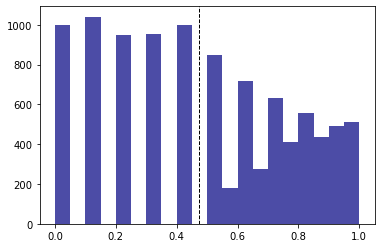

In [131]:
# use matplotlib to plot the histogram with alpha of .7 to make slightly transparent
plt.hist(num,bins=20, color='navy',alpha=0.7)
plt.axvline(0.47356, color='k', linestyle='dashed', linewidth=1)
plt.show()